In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In statistics, ml, and data science we **Optimize** lot of stuffs

when we fit a line **with linear regresssion** we `optimize` the `intercept` and the `slope`

in Logistic regression we optimize squiggle.

these are few examples but there are tons more

The gradient decent can optimize this all things and much more.

by learning how to fit line in regression then we have also learned how to fit squiggle, and all others.


Let's take simple dataset

# example 1

x-axis = weight
y-axis = height

fit a line to data and predict height based on height.

prob: how GD can fit line to data by finding optimal value for intercept and slope

1st start by finding intercept using GD, meaning we already have slope

predicted height = intercept + slope * weight

                  = intercept + 0.64 * weight

use GD to find optimal value of intercept

step 1: pick random value for intercept as initial guess. for now take 0. now equation becomes following:

        0 + 0.64 * weight

In [ ]:
weight = [0.5, 2.5, 3]
height_y = [1.5,2,3.2]

(0.0, 4.0)

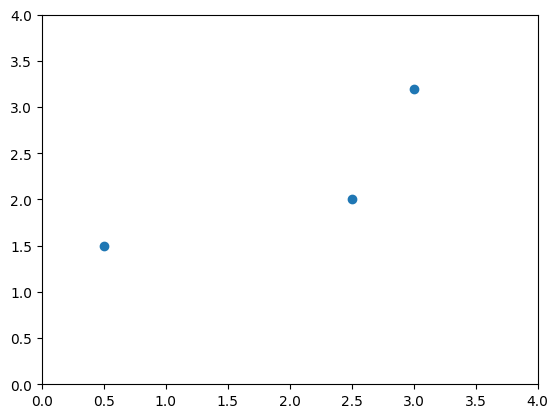

In [ ]:
plt.scatter(weight, height_y)
plt.xlim(0,4)
plt.ylim(0,4)

In [ ]:
def height(weight, intercept):
  return intercept + (0.64*weight)

for evalueation we will use sum of the squre residule which is loss function.

In [ ]:
intrcept = 0
ssr_all = []
itrcpt_all = [0,0.2,0.7,0.85,0.99,1.2,1.5,1.8]
predicted_zero = [height(i,intrcept) for i in weight]
predicted_zero
itrcpt_all.append(0)

0
0.2
0.7
0.85
0.99
1.2
1.5
1.8
0


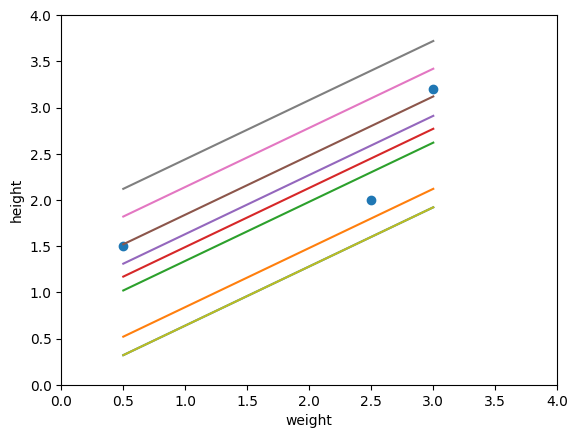

In [ ]:

plt.scatter(weight, height_y)
plt.xlim(0,4)
plt.ylim(0,4)
plt.xlabel("weight")
plt.ylabel("height")
for icpt in itrcpt_all:
  print(icpt)
  predicted = [height(i,icpt) for i in weight]
  squred_residule = [(height_y[i]-predicted[i])**2 for i in range(0,len(height_y))]
  sum_of_squred_residule = sum(squred_residule)
  ssr_all.append(sum_of_squred_residule)
  plt.plot(weight,predicted)

In [ ]:
def plot_g(predicted):
  print(weight)
  print(height_y)
  plt.scatter(weight, height_y)
  plt.xlim(0,4)
  plt.ylim(0,4)
  plt.xlabel("weight")
  plt.ylabel("height")
  plt.plot(weight,predicted)

[0.5, 2.5, 3]
[1.5, 2, 3.2]


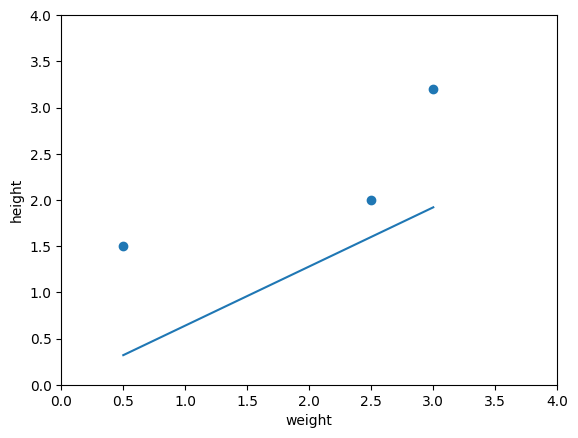

In [ ]:
# draw line when intercept is 0
plot_g(predicted_zero)

In [ ]:
squred_residule = [(height_y[i]-predicted_zero[i])**2 for i in range(0,len(height_y))]

sum_of_squred_residule = sum(squred_residule)
sum_of_squred_residule # when intercept = 0

3.1908000000000003

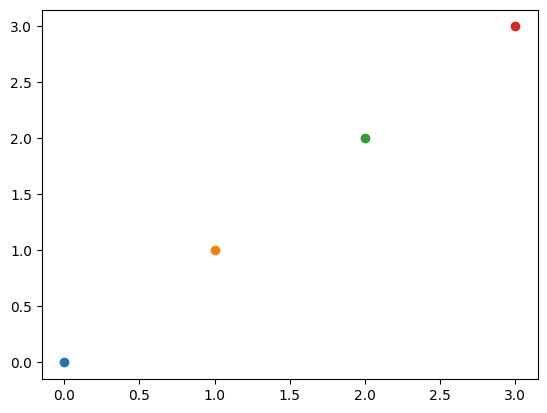

In [ ]:
for i in range(0,4):
  plt.scatter(i,i)

In [ ]:
ssr_all.append(sum_of_squred_residule)

Text(0, 0.5, 'sum of squred residule')

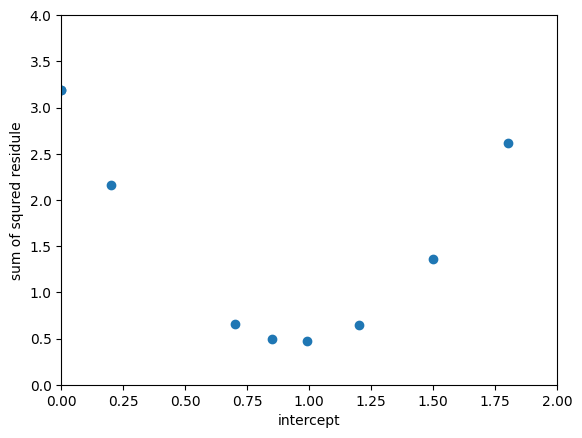

In [ ]:
# sum of squred residule and intercept graph

plt.scatter(itrcpt_all, ssr_all)
plt.xlim(0,2)
plt.ylim(0,4)
plt.xlabel("intercept")
plt.ylabel("sum of squred residule")

out of all the lowest ssr is when intercept is 1.

but what if the best values of intercept somewere between 0.8 to 1.2?

Above method is slow we can add more intercept values and find the intercept

Let's see how GD is efficient

## Gradient decent

it only does few calculations far from optimal solutions  and increases no of calculations closer to the optimal value

**Meaning**: It identifies optimal values by taking big steps when it is far away.
baby step when it is close.

function of sum of the squred residules =  $$ \sum_{k=1}^n (actual-predicted)^2 $$

simplified = $$ \sum_{k=1}^n (actual-(intercept+slope*weight))^2 $$

**As we have equation for curve we can have derivative of ssr with respect to intercept and determine the slope of the any value of intercept**

To take derivative we need to apply the chain rule.

**derivative of ssr is** = $$ \sum_{k=1}^n 2(actual-(intercept+slope*weight))*-1 $$

Now we have derivative of ssr, GD will use it to find where ssr is lowest

### Why use GD?
if we use least squares to solve optimal value for intercept, we would simply find the slope of the curve = 0

But in GD, it finds min value by taking steps from initial guess to until it reaches to the best value

this makes GD very usefull when it's not possible to solve for where derivative = 0. and that's why it can be used in so many different situations.

In [ ]:
# derivative of SSR with respect to intercept
def der_of_ssr(actual, intercept, weight):
  ans = (2*(actual-(intercept+(0.64*weight)))*(-1))
  # print(ans)
  return ans

In [ ]:
for i in range(0,len(itrcpt_all)):
  sl = [der_of_ssr(height_y[k],itrcpt_all[i], weight[k]) for k in range(0,len(height_y))]

  print("when intercept = ",itrcpt_all[i] )
  print(sum(sl))


when intercept =  0
-5.720000000000001
when intercept =  0.2
-4.52
when intercept =  0.7
-1.5200000000000005
when intercept =  0.85
-0.6200000000000001
when intercept =  0.99
0.21999999999999975
when intercept =  1.2
1.4799999999999995
when intercept =  1.5
3.28
when intercept =  1.8
5.08
when intercept =  0
-5.720000000000001


**Note** in above values as we get closer to the optimal value for intercept, the closer the slope of the curve gets to 0

This means when the slope of the curve is close to 0, then we should take the baby steps, and when slope is far from 0, then we should take big steps, because we are far from the optimal value


But If we take super huze step then we would increase the ssr.

so the size of the step should be related to the slop, because it tells us that whether we should take baby steps or a big step. but we need to make sure the big step is not too big.

## How GD gets step size
it gets step size by slope by small no called **learning rate**

step size = slope*learning_rate

new_intercept = old_intercept - step_size

In [ ]:
# when intercept = 0 step size
-5.720*0.1

-0.572

In [ ]:
0-(-0.572) # get the new intercept

0.572

in one big step we moved much closer to the optimal value for  intercept

Intercept:  0
slope:  -5.720000000000001
step Size:  -0.5720000000000001
Intercept:  0.5720000000000001
slope:  -2.288
step Size:  -0.2288
Intercept:  0.8008000000000001
slope:  -0.9151999999999996
step Size:  -0.09151999999999996
Intercept:  0.89232
slope:  -0.3660800000000002
step Size:  -0.03660800000000002
Intercept:  0.928928
slope:  -0.14643200000000034
step Size:  -0.014643200000000035
Intercept:  0.9435712
slope:  -0.05857279999999987
step Size:  -0.005857279999999987
Intercept:  0.94942848
slope:  -0.023429120000000747
step Size:  -0.002342912000000075
Intercept:  0.951771392
slope:  -0.009371648000000565
step Size:  -0.0009371648000000565
Intercept:  0.9527085568000001
slope:  -0.003748659199999338
step Size:  -0.0003748659199999338
Intercept:  0.95308342272
slope:  -0.0014994636800000904
step Size:  -0.00014994636800000905


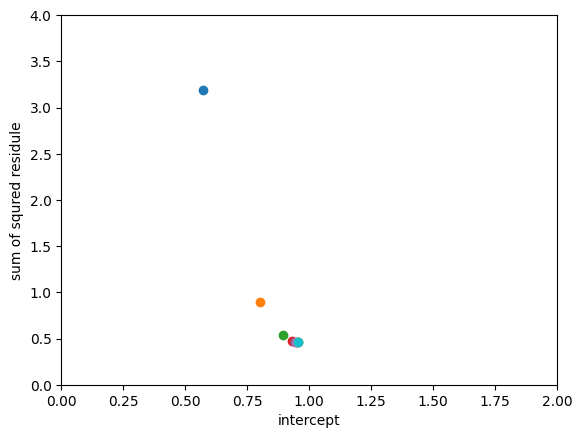

In [ ]:
old_intercept = 0
for i in range(0,10):
  sl = [der_of_ssr(height_y[k],old_intercept, weight[k]) for k in range(0,len(height_y))]
  der = sum(sl)
  squred_residule = [(height_y[j]-height(weight[j],old_intercept))**2 for j in range(0,len(height_y))]
  print("Intercept: ", old_intercept)
  print("slope: ", der)
  step_size = der*0.1 # 0.1 is learning rate
  print("step Size: ", step_size)
  old_intercept = old_intercept-(step_size)

  sum_of_squred_residule = sum(squred_residule)
  plt.scatter(old_intercept, sum_of_squred_residule)
  plt.xlim(0,2)
  plt.ylim(0,4)
  plt.xlabel("intercept")
  plt.ylabel("sum of squred residule")

🎉 GD done
### TODO: print line as well


Gold standard: how does GD stops taking steps?

GD stops when the step size is very close to 0.

step size will be very close to 0 when slop will be very close to 0

in practice minimum step_size = 0.001 or smaller

if slope is 0.009 * learning rate 1 = 0.0009 which is smaller than 0.001 so GD here will stop

GD also includes no of steps it will take before giving up

in practice max no of steps is 1000 or greater

so even if step size is large, if there have been more than maximum no of steps, GD will stop

## Finding Intercept and Slope

y = ssr

x = slope

z = intercept


**derivative of ssr with respect to slope is** = $$ \sum_{k=1}^n 2(actual-(intercept+slope*weight))*(-weight) $$



In [ ]:
def der_of_ssr_intercept(actual, intercept, slope, weight):
  ans = (2*(actual-(intercept+(slope*weight)))*(-1))
  # print(ans)
  return ans

def der_ssr_slope(actual, intercept, slope, weight):
  ans = (2*(actual-(intercept+(slope*weight))*(-weight)))
  return ans


start by picking up random value for intercept = 0
and for slope = 1

In [ ]:
from matplotlib import cm

In [ ]:
old_intercept = 0
old_slope = 1

x,y,z = [],[],[]

for i in range(0,10):
  sl = [der_of_ssr_intercept(height_y[k],old_intercept, old_slope, weight[k]) for k in range(0,len(height_y))]
  der_intercept = sum(sl) # slope of intercept

  squred_residule = [(height_y[j]-height(weight[j],old_intercept))**2 for j in range(0,len(height_y))]

  sl_slope = [der_ssr_slope(height_y[k],old_intercept, old_slope, weight[k]) for k in range(0,len(height_y))]
  sum_of_squred_residule = sum(squred_residule)

  step_size_intercept = der_intercept*0.01 # 0.1 is learning rate
  print("Intercept: ", old_intercept)
  print("slope_intercept: ", der_intercept)
  print("step Size_intercept: ", step_size_intercept)
  old_intercept = old_intercept-(step_size_intercept)

  der_slope = sum(sl_slope) # slope of slope
  step_size_slope = der_slope*0.01
  print("Slope: ", old_slope)
  print("slope_slope: ", der_slope)
  print("step Size_slope: ", step_size_slope)
  old_slope = old_slope-(step_size_slope)

  x.append(old_intercept)
  y.append(old_slope)
  z.append(sum_of_squred_residule)



Intercept:  0
slope_intercept:  -1.4000000000000004
step Size_intercept:  -0.014000000000000004
Slope:  1
slope_slope:  44.4
step Size_slope:  0.444
Intercept:  0.014000000000000004
slope_intercept:  -6.644
step Size_intercept:  -0.06644
Slope:  0.556
slope_slope:  30.804000000000002
step Size_slope:  0.30804000000000004
Intercept:  0.08044
slope_intercept:  -9.94184
step Size_intercept:  -0.09941839999999999
Slope:  0.24796
slope_slope:  22.052039999999998
step Size_slope:  0.22052039999999998
Intercept:  0.17985839999999997
slope_intercept:  -11.991574400000001
step Size_intercept:  -0.11991574400000002
Slope:  0.027439600000000036
slope_slope:  16.4089284
step Size_slope:  0.164089284
Intercept:  0.299774144
slope_intercept:  -13.241151343999999
step Size_intercept:  -0.13241151344
Slope:  -0.13664968399999997
slope_slope:  12.761149524
step Size_slope:  0.12761149524
Intercept:  0.43218565744000004
slope_intercept:  -13.97802020624
step Size_intercept:  -0.1397802020624
Slope:  -0.

## Attention

try using 0.1 as learning rate as we used it previously

and then 0.01

with 0.1 we does not arrived at optimal parameters with couple of iterations

but with 0.01 we can

that means GD can be very sensitive to the learning rate

✅ in practice it is determined automatically by starting large and getting smaller with each step


TypeError: ignored

<Figure size 640x480 with 0 Axes>